In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
           'marital_status', 'occupation', 'relationship', 'race', 'sex', 
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'earnings']

In [5]:
data = pd.read_csv('data/adult_train.csv', names=columns, index_col=False)

In [6]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.shape

(32561, 15)

In [8]:
def remove_space(df, column_list):
    for column in column_list:
        df[column]=df[column].map(lambda x: str(x)[1:])
    return df

In [9]:
columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race',
           'sex', 'native_country', 'earnings']

data = remove_space(data, columns)

In [10]:
for column in columns:
    print(column,'\n',data[column].value_counts(),'\n')

workclass 
 Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

education 
 HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

marital_status 
 Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64 

occupation 
 Prof-specialty       4140
Craft-repair    

In [11]:
data['earnings'][(data['workclass']=='?')|(data['occupation']=='?')|(data['native_country']=='?')].describe()

count      2399
unique        2
top       <=50K
freq       2066
Name: earnings, dtype: object

In [12]:
data['earnings'][(data['workclass'] == '?') & (data['occupation'] == '?')].describe()

count      1836
unique        2
top       <=50K
freq       1645
Name: earnings, dtype: object

In [13]:
data['earnings'][(data['native_country'] == '?')].describe()

count       583
unique        2
top       <=50K
freq        437
Name: earnings, dtype: object

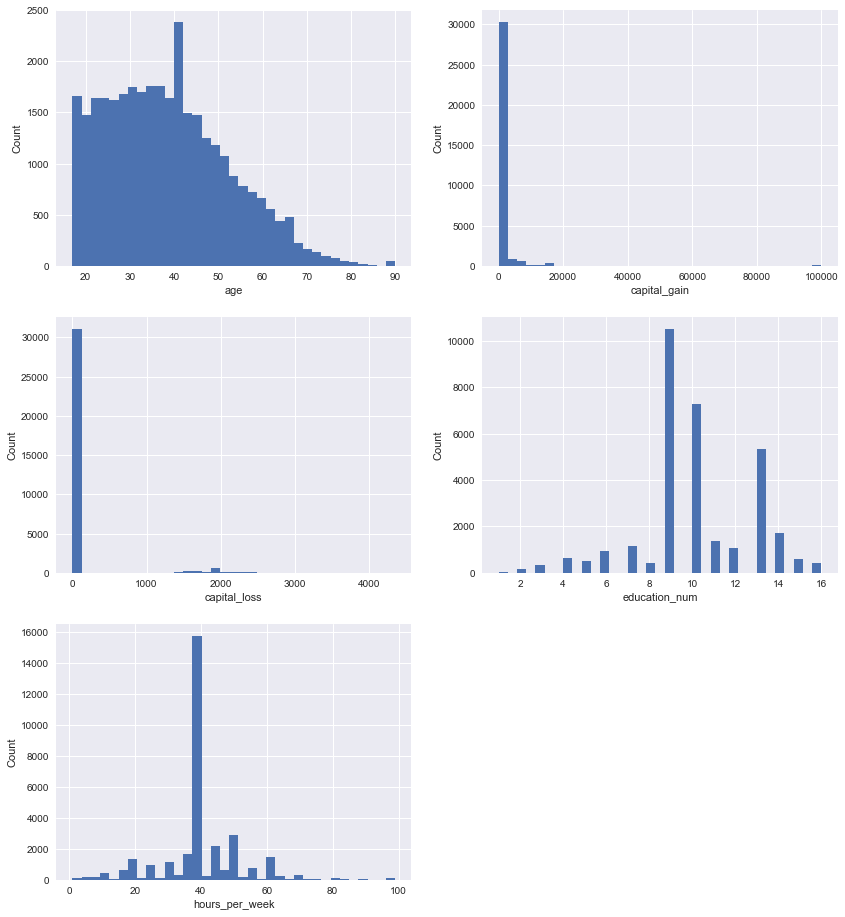

In [14]:
feats = ['age', 'capital_gain', 'capital_loss', 'education_num', 'hours_per_week']
nrows, ncols = 3,2
fig = plt.figure(figsize = (14, 16))
for i in range (1,6):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.hist(x = data[feats[i-1]], bins=35)
    ax.set_ylabel('Count')
    ax.set_xlabel(feats[i-1])

#fig.savefig('train_data_hist.png', transparent = False, dpi = 80, bbox_inches = 'tight')

In [15]:
zero_cap_gain = data['capital_gain'][data['capital_gain'] == 0].count()/len(data)
zero_cap_loss = data['capital_loss'][data['capital_loss'] == 0].count()/len(data)

In [16]:
print ('percent of records with no capital gain = ', zero_cap_gain)
print ('percent of records with no capital loss = ', zero_cap_loss)

percent of records with no capital gain =  0.916710174749
percent of records with no capital loss =  0.953349098615


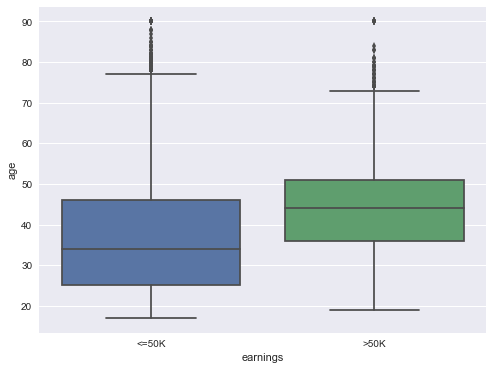

In [17]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = data['earnings'], y = data['age'], ax=ax)
#ax.get_figure().savefig('age_box', transparent = False, dpi = 80, bbox_inches = 'tight')

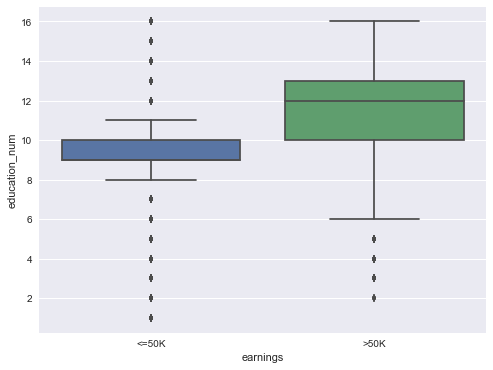

In [18]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x=data['earnings'], y=data['education_num'], ax=ax)
#ax.get_figure().savefig('education_box', transparent = False, dpi = 80, bbox_inches = 'tight')

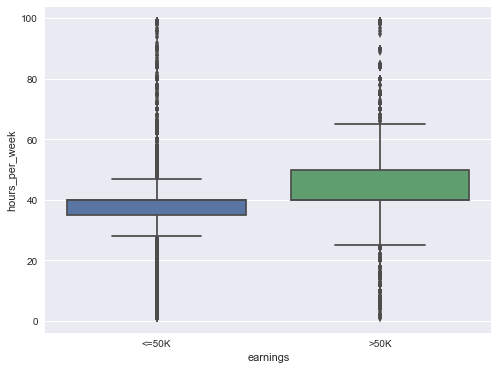

In [19]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = data['earnings'], y = data['hours_per_week'])
#ax.get_figure().savefig('hours_box', transparent = False, dpi = 80, bbox_inches = 'tight')

## Data Cleaning

In [20]:
def drop_rows(df, column_list, value):
    for column in column_list:
        df = df[df[column] != value]
    df = df.reset_index(drop=True)
    return df

In [21]:
columns = ['workclass', 'occupation', 'native_country']

In [22]:
data = drop_rows(data, columns, '?')

In [25]:
data_set_balance = data['earnings'][data['earnings'] == '<=50K'].count()/ data['earnings'][data['earnings'] == '>50K'].count()

In [26]:
data_set_balance

3.0173148641449119

In [30]:
X = data.drop(data[['fnlwgt', 'education', 'earnings']], axis=1)
y = data['earnings']

## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
dummy_columns = ['workclass', 'marital_status', 'occupation', 
                 'relationship', 'race', 'sex', 'native_country']

In [33]:
X_tree = pd.get_dummies(X, columns=dummy_columns)
y_tree = pd.get_dummies(y, columns='earnings')['>50K']

In [27]:
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=7)

In [68]:
score = cross_val_score(tree_clf, X_tree, y_tree, cv = 5)
print(score)
print(score.mean())

[ 0.84535057  0.8463451   0.85264379  0.85543767  0.85408722]
0.85077286962


In [114]:
pred = cross_val_predict(tree_clf, X_tree, y_tree, cv = 5)

In [128]:
confusion_matrix(y_tree, pred)

array([[21643,  1011],
       [ 3490,  4018]])

In [127]:
print(classification_report(y_tree, pred))

             precision    recall  f1-score   support

          0       0.86      0.96      0.91     22654
          1       0.80      0.54      0.64      7508

avg / total       0.85      0.85      0.84     30162



## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rnd_clf = RandomForestClassifier(n_estimators = 500, warm_start=True, random_state = 7)

In [69]:
score = cross_val_score(rnd_clf, X_tree, y_tree, cv = 5)
print(score)
print(score.mean())

[ 0.84899718  0.84303     0.84551633  0.85179045  0.84927873]
0.84772253764


In [129]:
pred = cross_val_predict(rnd_clf, X_tree, y_tree, cv = 5)

In [130]:
confusion_matrix(y_tree, pred)

array([[20804,  1850],
       [ 2743,  4765]])

In [131]:
print(classification_report(y_tree, pred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90     22654
          1       0.72      0.63      0.67      7508

avg / total       0.84      0.85      0.84     30162



### Feature Importance

In [74]:
features = X_tree.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [75]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            features[indices[f]],
                            importances[indices[f]]))

 1) age                            0.225689
 2) education_num                  0.131830
 3) hours_per_week                 0.112624
 4) capital_gain                   0.105096
 5) marital_status_Married-civ-spouse 0.070919
 6) relationship_Husband           0.044013
 7) capital_loss                   0.035175
 8) marital_status_Never-married   0.024845
 9) occupation_Exec-managerial     0.019545
10) occupation_Prof-specialty      0.018237
11) relationship_Not-in-family     0.011238
12) workclass_Private              0.010835
13) relationship_Wife              0.010795
14) sex_Female                     0.009645
15) relationship_Own-child         0.009517
16) sex_Male                       0.009372
17) workclass_Self-emp-not-inc     0.008870
18) occupation_Other-service       0.008422
19) occupation_Craft-repair        0.007500
20) occupation_Sales               0.007356
21) workclass_Self-emp-inc         0.006648
22) race_White                     0.006638
23) marital_status_Divorced  

## LINEAR SVM

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [77]:
scale_columns = ['age', 'capital_gain', 'capital_loss', 'education_num', 'hours_per_week']
scaled_columns = ['age_scaled', 'capital_gain_scaled', 'capital_loss_scaled', 'education_num_scaled', 'hours_per_week_scaled']
scaler = StandardScaler()

In [78]:
scaled_data = pd.DataFrame(data=scaler.fit_transform(X_tree[scale_columns]), columns = scaled_columns)

In [79]:
X_svm = pd.concat([X_tree, scaled_data], axis=1)

In [80]:
X_svm = X_svm.drop(scale_columns, axis=1)

In [81]:
y_svm = y_tree

In [82]:
svm_clf = LinearSVC(C=1, loss='hinge')

In [84]:
score = cross_val_score(svm_clf, X_svm, y_svm, cv = 5)

In [85]:
print(score)
print(score.mean())

[ 0.84468755  0.84336151  0.84849992  0.84897215  0.84944454]
0.846993133142


In [133]:
pred = cross_val_predict(svm_clf, X_svm, y_svm, cv = 5)

In [135]:
confusion_matrix(y_svm, pred)

array([[21004,  1650],
       [ 2967,  4541]])

In [136]:
print(classification_report(y_svm, pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     22654
          1       0.73      0.60      0.66      7508

avg / total       0.84      0.85      0.84     30162



## Polynomial Kernel

In [49]:
from sklearn.svm import SVC

In [50]:
poly_kernel_svm_clf = SVC(kernel='poly', degree=2, coef0=1, C=1)

In [86]:
score = cross_val_score(poly_kernel_svm_clf, X_svm, y_svm, cv = 3)

In [87]:
print(score)
print(score.mean())

[ 0.84574838  0.85130296  0.8511887 ]
0.849413349258


In [138]:
pred = cross_val_predict(poly_kernel_svm_clf, X_svm, y_svm, cv = 3)

In [139]:
confusion_matrix(y_svm, pred)

array([[21214,  1440],
       [ 3102,  4406]])

In [140]:
print(classification_report(y_svm, pred))

             precision    recall  f1-score   support

          0       0.87      0.94      0.90     22654
          1       0.75      0.59      0.66      7508

avg / total       0.84      0.85      0.84     30162



## RBF Kernel

In [88]:
rbf_kernel_svm_clf = SVC(kernel='rbf', gamma=5, C=0.001)

In [89]:
score = cross_val_score(rbf_kernel_svm_clf, X_svm, y_svm, cv = 3)

In [90]:
print(score)
print(score.mean())

[ 0.75106912  0.75104436  0.75111907]
0.75107751641


## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
log_reg = LogisticRegression()

In [97]:
score = cross_val_score(log_reg, X_svm, y_svm, cv = 5)

In [98]:
print(score)
print(score.mean())

[ 0.84584784  0.84186972  0.85148351  0.85195623  0.84795225]
0.847821908196


In [141]:
pred = cross_val_predict(log_reg, X_svm, y_svm, cv = 5)

In [142]:
confusion_matrix(y_svm, pred)

array([[20993,  1661],
       [ 2929,  4579]])

In [143]:
print(classification_report(y_svm, pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     22654
          1       0.73      0.61      0.67      7508

avg / total       0.84      0.85      0.84     30162



## Ensemble

In [180]:
from sklearn.ensemble import VotingClassifier

In [181]:
log_reg = LogisticRegression()
svm_clf = LinearSVC(C=1, loss='hinge')
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=7)
voting_clf = VotingClassifier(estimators = [('lr', log_reg), ('svm', svm_clf), ('tree', tree_clf)], voting = 'hard')

In [182]:
score = cross_val_score(voting_clf, X_svm, y_svm, cv=5)

In [183]:
print(score)
print(score.mean())

[ 0.84667661  0.8445218   0.85148351  0.85295093  0.84994197]
0.849114962203


## Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
scores = {}
lambdas = [0.0001, 0.001, 0.01, 0.1, 1]

gbc = GradientBoostingClassifier()

for l in lambdas:
    gbc.set_params(learning_rate=l, n_estimators=500, random_state=1)
    gbc.fit(X_tree, y_tree)
    scores[l] = gbc.score(X_tree, y_tree)

In [108]:
scores

{0.0001: 0.75107751475366358,
 0.001: 0.79729460911080163,
 0.01: 0.85746966381539691,
 0.1: 0.88090975399509319,
 1: 0.88263377760095485}

In [109]:
gbc = GradientBoostingClassifier(learning_rate = 1, n_estimators = 500, random_state = 1)

In [110]:
score = cross_val_score(gbc, X_tree, y_tree, cv=3)

In [111]:
print(score)
print(score.mean())

[ 0.85758329  0.85995624  0.8669054 ]
0.861481643197


In [144]:
pred = cross_val_predict(gbc, X_tree, y_tree, cv = 3)

In [145]:
confusion_matrix(y_tree, pred)

array([[21035,  1619],
       [ 2559,  4949]])

In [146]:
print(classification_report(y_tree, pred))

             precision    recall  f1-score   support

          0       0.89      0.93      0.91     22654
          1       0.75      0.66      0.70      7508

avg / total       0.86      0.86      0.86     30162



## Hyperparameter Tuning

In [147]:
from sklearn.model_selection import GridSearchCV

In [149]:
param_grid = [{'n_estimators':[500, 750, 1000], 'learning_rate':[0.5, 1, 1.5], 'max_depth':[1, 2, 3]}]

In [150]:
gbc = GradientBoostingClassifier()

In [151]:
grid_search = GridSearchCV(gbc, param_grid, cv=4)

In [152]:
grid_search.fit(X_tree, y_tree)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [500, 750, 1000], 'learning_rate': [0.5, 1, 1.5], 'max_depth': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [153]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.864001060938 {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 500}
0.866255553345 {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 750}
0.866885485047 {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 1000}
0.868211657052 {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 500}
0.867813805451 {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 750}
0.868775280154 {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 1000}
0.865957164644 {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 500}
0.863304820635 {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 750}
0.862509117433 {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 1000}
0.860553013726 {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 500}
0.860718785226 {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 750}
0.860652476626 {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 1000}
0.867183873748 {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 500}
0.867217028049 {'learning_rat

In [154]:
grid_search.best_params_

{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 1000}

## Additional Tuning

In [155]:
param_grid2 = [{'n_estimators':[1000,1500], 'learning_rate':[0.1, .25, 0.5]}] 

In [156]:
gbc2 = GradientBoostingClassifier(max_depth = 2)

In [157]:
grid_search2 = GridSearchCV(gbc2, param_grid2, cv=3)

In [158]:
grid_search2.fit(X_tree, y_tree)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1000, 1500], 'learning_rate': [0.1, 0.25, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [161]:
cvres2 = grid_search2.cv_results_
for mean_score, params in zip(cvres2['mean_test_score'], cvres2['params']):
    print(mean_score, params)

0.869537829056 {'learning_rate': 0.1, 'n_estimators': 1000}
0.869836217757 {'learning_rate': 0.1, 'n_estimators': 1500}
0.869405211856 {'learning_rate': 0.25, 'n_estimators': 1000}
0.868708971554 {'learning_rate': 0.25, 'n_estimators': 1500}
0.86758172535 {'learning_rate': 0.5, 'n_estimators': 1000}
0.866620250647 {'learning_rate': 0.5, 'n_estimators': 1500}


In [160]:
grid_search2.best_params_

{'learning_rate': 0.1, 'n_estimators': 1500}

## Addressing Data Set Imbalance

In [78]:
y = pd.DataFrame(y_tree)

In [79]:
y['sample_weight'] = np.where(y['>50K']==0, 1, 3)

In [80]:
gbc_final = GradientBoostingClassifier(max_depth=2, learning_rate=0.1, n_estimators=1500)

In [81]:
gbc_final.fit(X_tree, y_tree, sample_weight=y['sample_weight'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [74]:
pred = gbc_final.predict(X_tree)

In [75]:
confusion_matrix(y_tree, pred)

array([[18924,  3730],
       [  874,  6634]])

In [86]:
print (classification_report(y_tree, pred))

             precision    recall  f1-score   support

          0       0.96      0.84      0.89     22654
          1       0.64      0.88      0.74      7508

avg / total       0.88      0.85      0.85     30162



## Model Metrics

In [196]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

In [185]:
gbc_final = GradientBoostingClassifier(max_depth = 2, learning_rate = 0.1, n_estimators = 1500)

In [204]:
pred = cross_val_predict(gbc_final, X_tree, y_tree, cv = 3)

In [205]:
mat = confusion_matrix(y_tree, pred)

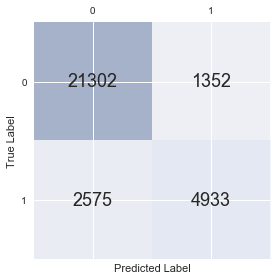

In [229]:
fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(mat.shape[1]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i, s=mat[i, j], va='center', ha='center', size=18)
        
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()
#fig.savefig('boosting_train_matrix.png', transparent = False, dpi = 80, bbox_inches = 'tight')

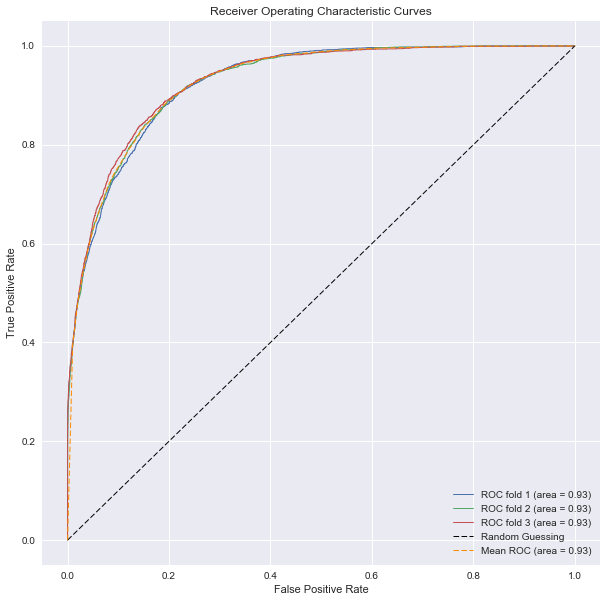

In [230]:
cv = list(StratifiedKFold(n_splits = 3, random_state=7).split(X_tree, y_tree))

mean_tpr = 0
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,10))

for i, (train, test) in enumerate(cv):
    probas = gbc_final.fit(X_tree.iloc[train], y_tree.iloc[train]).predict_proba(X_tree.iloc[test])
    fpr, tpr, thresholds = roc_curve(y_tree.iloc[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='k', label='Random Guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='darkorange', linestyle='--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=1)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()

#fig.savefig('boosting_train_roc.png', transparent = False, dpi = 80, bbox_inches = 'tight')